## Step 1: Reading and Understanding the Data

In [100]:
# Import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

In [101]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [102]:
# Read datset
ds = pd.read_csv("data.csv")
ds.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [103]:
ds.shape

(730, 16)

In [104]:
ds.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [105]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Step 2: Visualising the Data

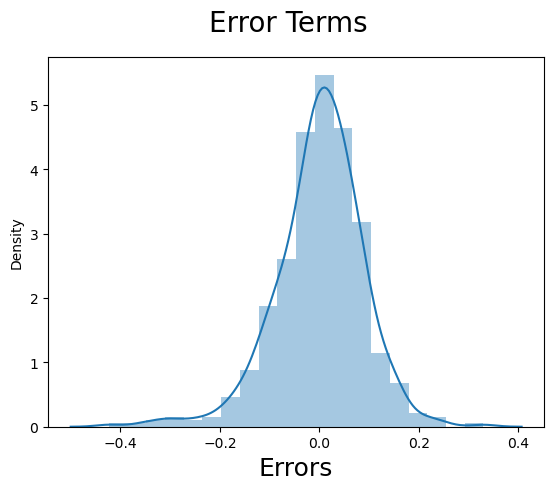

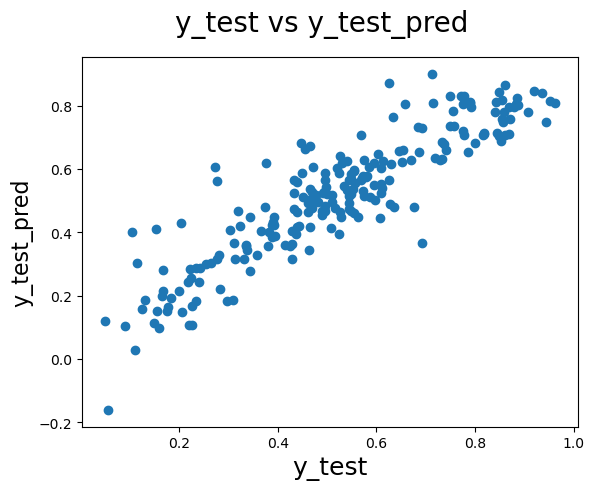

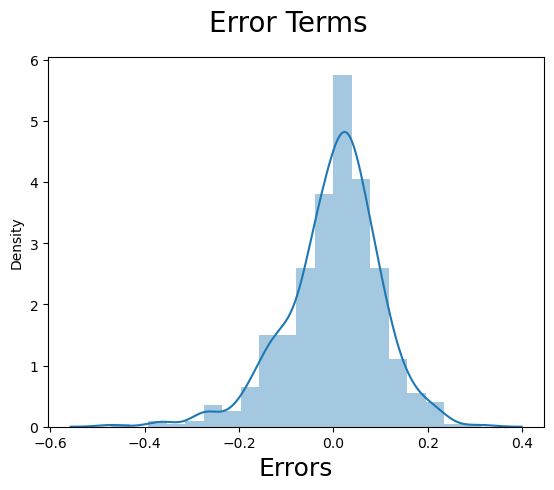

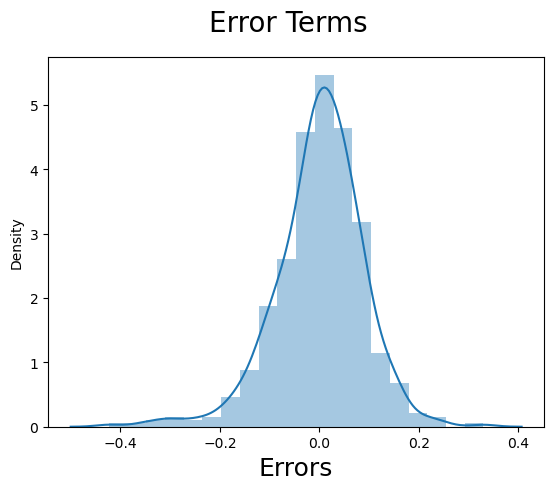

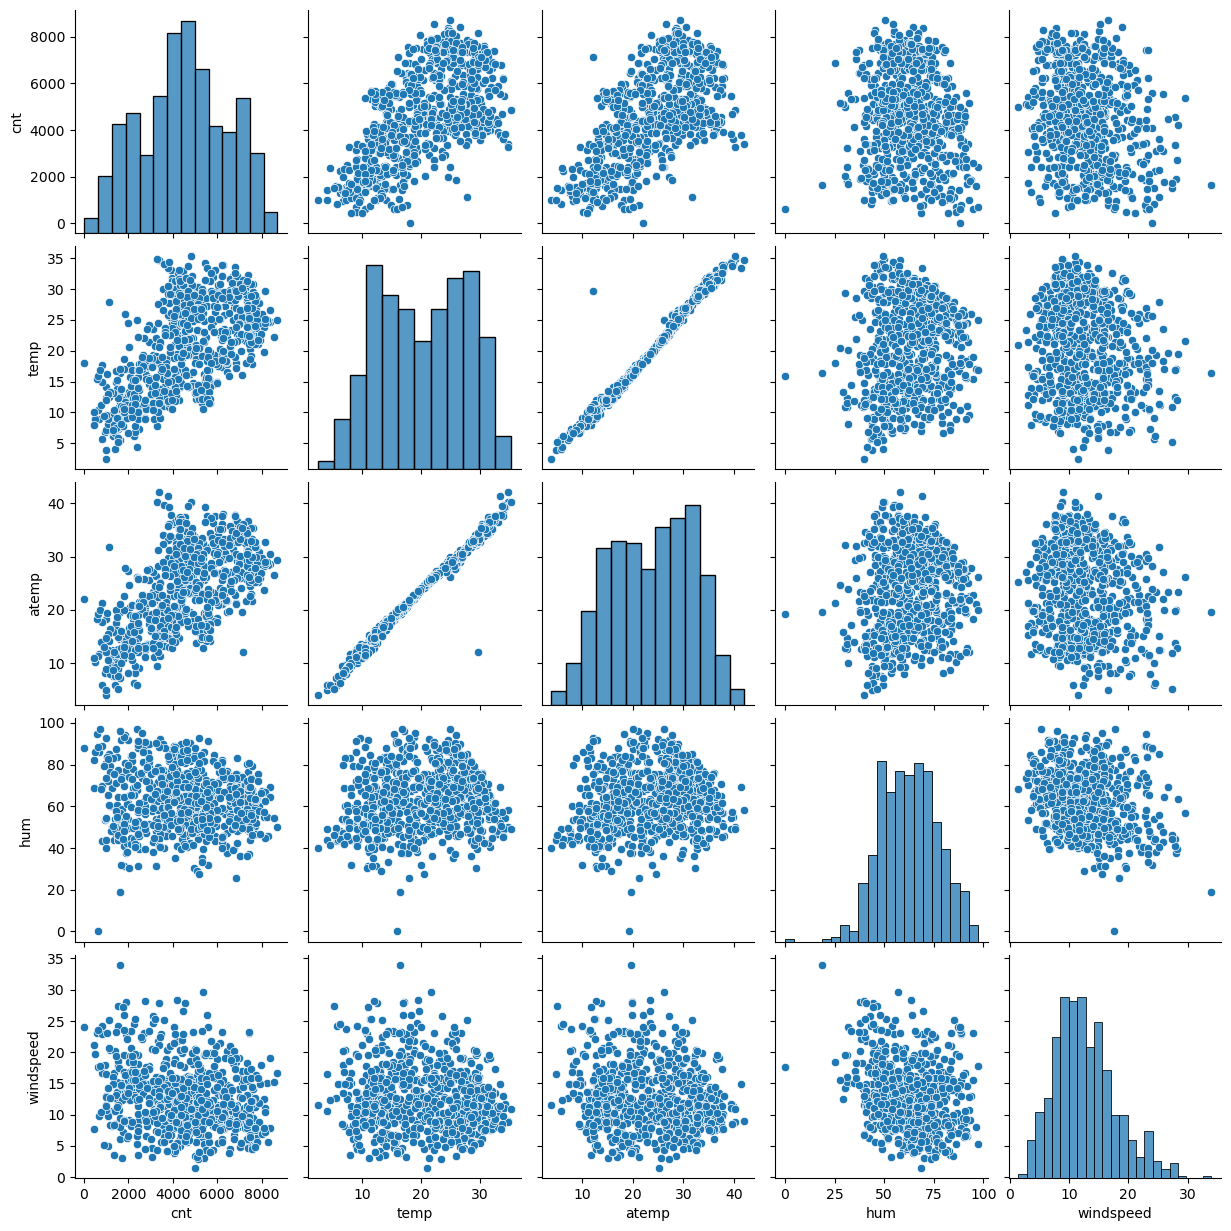

In [106]:
#### Visualising Numeric Variables using pairplot

sns.pairplot(data=ds,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

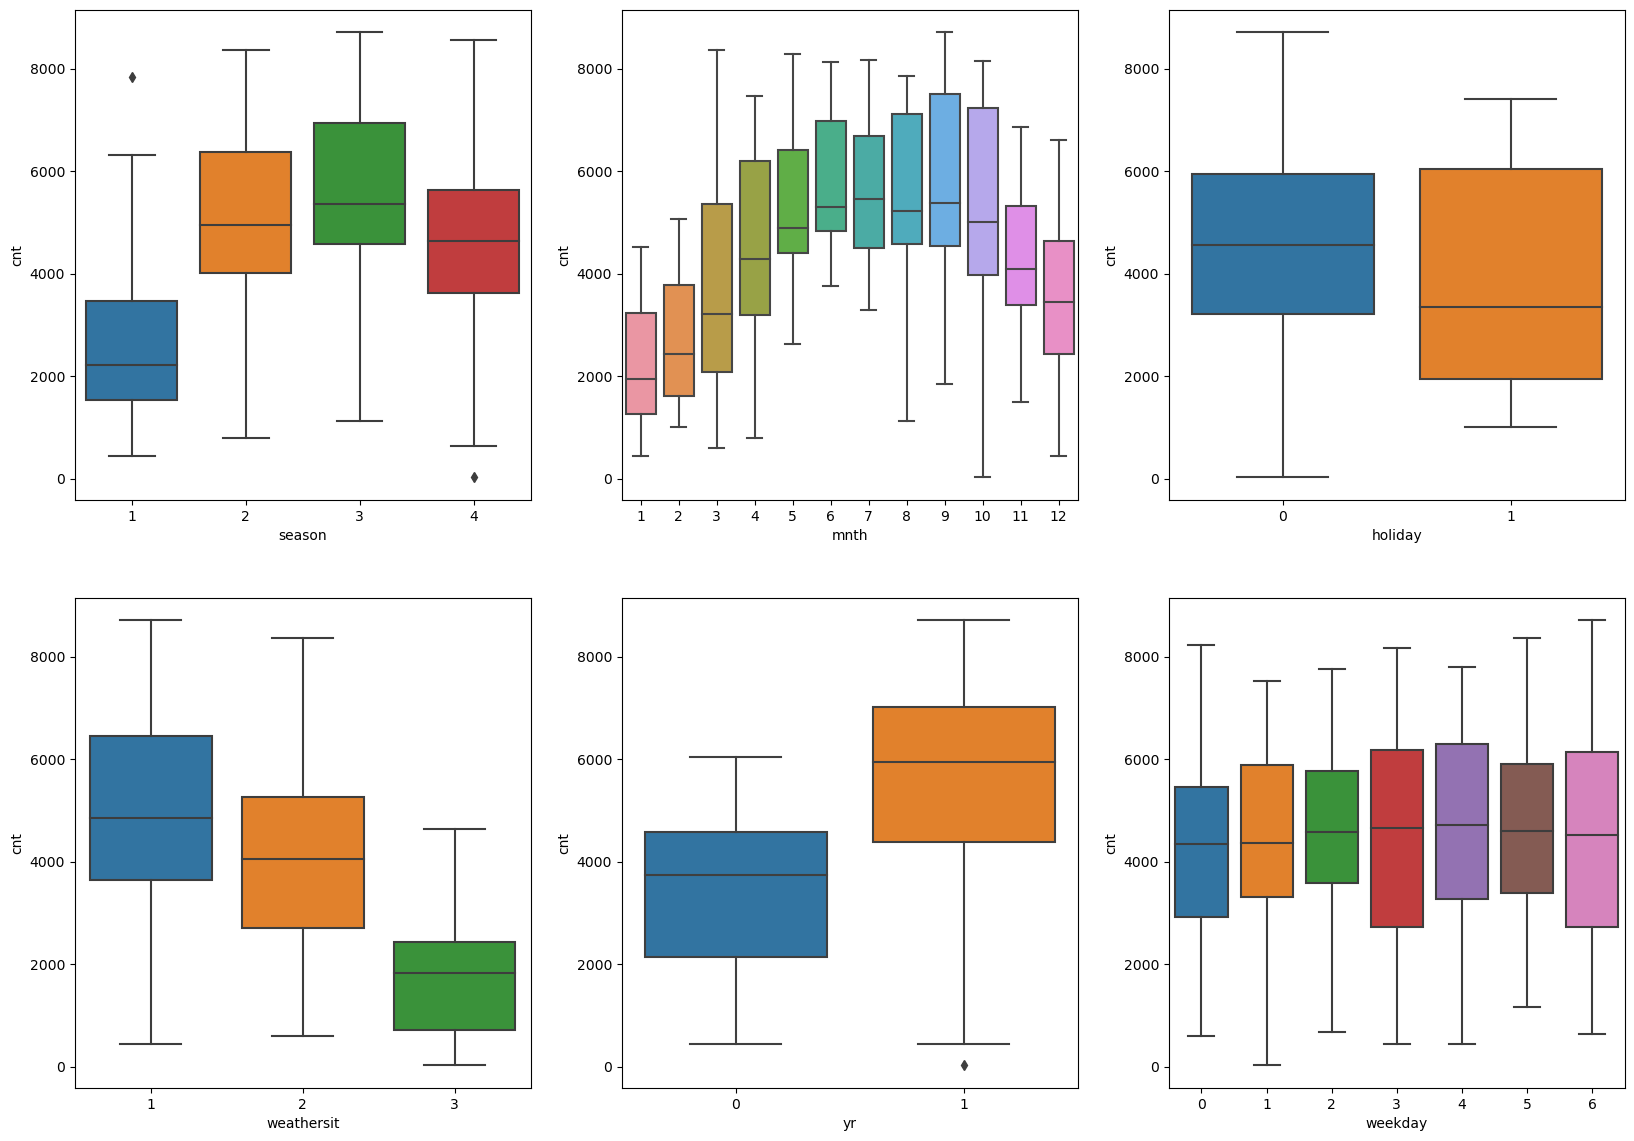

In [107]:
#### Visualising Categorical Variables

plt.figure(figsize=(20, 14))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = ds)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = ds)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = ds)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = ds)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = ds)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = ds)
plt.show()

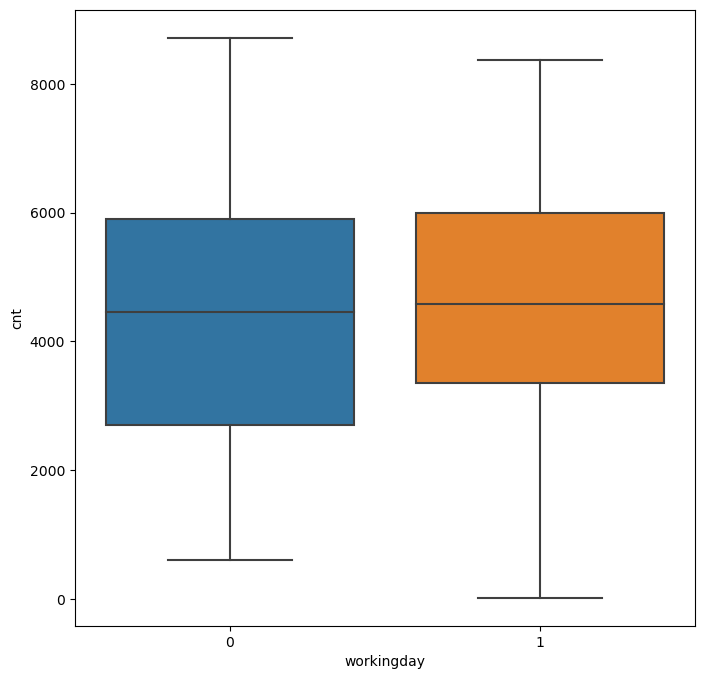

In [108]:
plt.figure(figsize = (8, 8))
sns.boxplot(x = 'workingday', y = 'cnt', data = ds)
plt.show()

#### Obeservations:
- The count of bike sharing is least for spring
- The number of bike shares incresed in 2019
- The cnt has zero values for weather situation - 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'(cat no 4)
- The cnt values increases in summer months
- The cnt values ars less during holidays

## Step 3: Data Prepration

In [109]:
# Dropping irrelevent features/columns
# Dropping "instant", "dteday" columns as the same info can be extracted from other feathers like "mnth" and "yr" columns
# dropping "casual" and "registered" users columns as this assignment is based on "cnt" which is the total of both user types.

drop_col = ["instant", "dteday", "casual", "registered"]
ds = ds.drop(drop_col, axis=1)
ds.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Converting some numeric values to categorical data

In [110]:
import calendar
ds['mnth'] = ds['mnth'].apply(lambda x: calendar.month_abbr[x])
ds.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [111]:
ds.season = ds.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})
ds.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [112]:
ds.weathersit = ds.weathersit.map({1:'Clear',2:'Mist & Cloudy',3:'Light Snow & Rain',4:'Heavy Snow & Rain'})
ds.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,6,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,0,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [113]:
ds.weekday = ds.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

ds.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Creating dummy Variables

In [114]:
### creating dummy variables for season , mnth ,weathersit ,weekday
dummy = ds[['season','mnth','weekday','weathersit']]

In [115]:
dummy = pd.get_dummies(dummy,drop_first=True )

In [116]:
## adding dummy variables to original dataset
ds = pd.concat([dummy,ds],axis = 1)

In [117]:
# Now let's see the head of our dataset.
ds.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [118]:
## dropping columns for which dummy variables were created
ds = ds.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1)

In [119]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 730 non-null    uint8  
 1   season_Summer                 730 non-null    uint8  
 2   season_Winter                 730 non-null    uint8  
 3   mnth_Aug                      730 non-null    uint8  
 4   mnth_Dec                      730 non-null    uint8  
 5   mnth_Feb                      730 non-null    uint8  
 6   mnth_Jan                      730 non-null    uint8  
 7   mnth_Jul                      730 non-null    uint8  
 8   mnth_Jun                      730 non-null    uint8  
 9   mnth_Mar                      730 non-null    uint8  
 10  mnth_May                      730 non-null    uint8  
 11  mnth_Nov                      730 non-null    uint8  
 12  mnth_Oct                      730 non-null    uint8  
 13  mnth_

## Step 4: Splitting the Data into Training and Testing Sets

In [120]:
ds_train, ds_test = train_test_split(ds, train_size = 0.7, test_size = 0.3, random_state = 100)

In [121]:
print("ds_train :" , ds_train.shape)
print("ds_test : ", ds_test.shape)

ds_train : (510, 30)
ds_test :  (219, 30)


## Step 5 : Rescaling the Features

In [122]:
# Apply scaler() to all the columns except the 'dummy' variables.
scaler = MinMaxScaler()

num_vars = ['cnt','hum','windspeed','temp','atemp']

ds_train[num_vars] = scaler.fit_transform(ds_train[num_vars])

ds_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [123]:
ds_train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.029412,0.343137,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.169124,0.475223,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


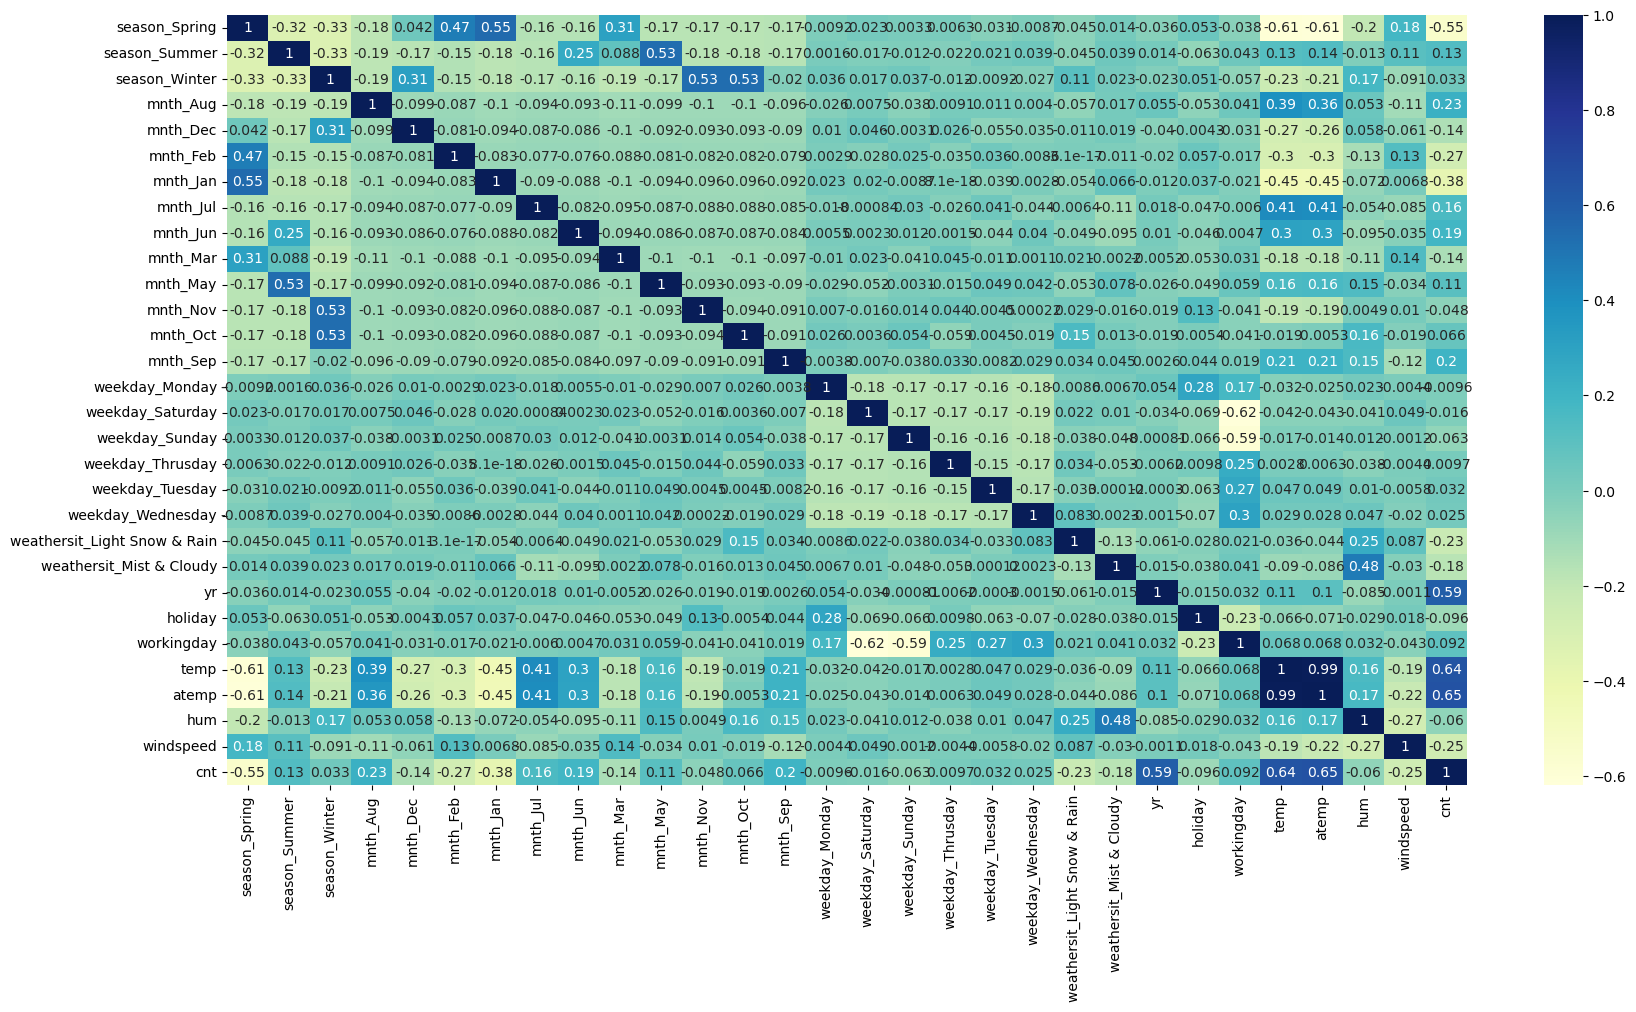

In [124]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(ds_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Step 6: Building model

### Dividing into X and Y sets for the model building

In [125]:
y_train = ds_train.pop('cnt')
X_train = ds_train

In [126]:
X_train.shape

(510, 29)

In [127]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

### Running RFE with the output number of the variable equal to 10

In [128]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15,step=1)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [129]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 7),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 8),
 ('weekday_Thrusday', False, 12),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1)]

### Building Model using statsmodel, for the detailed statistics


### Model 1
#### Starting with all the columns selected by RFE

In [130]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [131]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [132]:
# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)

In [133]:
# Create a first fitted model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [134]:
# Check the parameters obtained

lm.params

const                           0.251042
season_Spring                  -0.050806
season_Summer                   0.049660
season_Winter                   0.094426
mnth_Jan                       -0.034326
mnth_Jul                       -0.053193
mnth_Sep                        0.081186
weekday_Saturday                0.053721
weathersit_Light Snow & Rain   -0.248777
weathersit_Mist & Cloudy       -0.057824
yr                              0.230502
holiday                        -0.058529
workingday                      0.043521
temp                            0.509836
hum                            -0.154716
windspeed                      -0.185956
dtype: float64

In [135]:
# Print a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          2.31e-191
Time:                        18:27:10   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Checking VIF for multicollinearity

In [136]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [137]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,hum,29.40
12,temp,17.77
11,workingday,5.31
14,windspeed,4.73
0,season_Spring,4.53
2,season_Winter,3.48
1,season_Summer,2.84
8,weathersit_Mist & Cloudy,2.29
9,yr,2.09
6,weekday_Saturday,1.98


#### Observation: VIF for "hum" and "temp" is quite high. So, let's drop "hum" feature first and create second model

### Model 2

In [138]:
X_train_new = X_train_rfe.drop(['hum'], axis=1)

In [139]:
X_train_new.columns

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'windspeed'],
      dtype='object')

In [140]:
X_train_lm = sm.add_constant(X_train_new)

In [141]:
# Create model
lm = sm.OLS(y_train,X_train_lm).fit()

In [142]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          7.33e-189
Time:                        18:27:12   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1737      0.031      5.525      0.000       0.112       0.235
season_Spring                   -0.0597      0.021     -2.861      0.004      -0.101      -0.019
season_Summer                    0.0434      0.015      2.890      0.004       0.014       0.073
season_Winter                    0.0797      0.017      4.650      0.000       0.046       0.113
mnth_Jan                        -0.0389      0.018     -2.215      0.027      -0.073      -0.004
mnth_Jul                        -0.0482      0.018     -2.635      0.009      -0.084      -0.012
mnth_Sep                         0.0753      0.017      4.522      0.000       0.043       0.108
weekday_Saturday                 0.0584      0.015      3.980      0.000       0.030       0.087
weathersit_Light Snow & Rain    -0.2917      0.024    -12.027      0.000      -0.339      -0.244
weathersit_Mist & Cloudy        -0.0826      0.009     -9.592      0.000      -0.100      -0.066
yr                               0.2344      0.008     29.019      0.000       0.218       0.250
holiday                         -0.0562      0.027     -2.058      0.040      -0.110      -0.003
workingday                       0.0465      0.012      3.983      0.000       0.024       0.069
temp                             0.4728      0.034     14.037      0.000       0.407       0.539
windspeed                       -0.1563      0.025     -6.292      0.000      -0.205      -0.107
==============================================================================
Omnibus:                       67.959   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.078
Skew:                          -0.690   Prob(JB):                     8.64e-37
Kurtosis:                       5.431   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF for multicollinearity

In [143]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,7.07
11,workingday,5.24
13,windspeed,4.67
0,season_Spring,3.08
1,season_Summer,2.33
9,yr,2.08
2,season_Winter,1.99
6,weekday_Saturday,1.97
3,mnth_Jan,1.62
4,mnth_Jul,1.59


### Observations from Model 2-
- All feature's VIFs are in optimal range (below 5)
- P Values of all the features are below .05
- R-squered and Adj R-squested doesn't have much difference and both are quite decent (.805 and .801 respectively). 

### So as per above observations, "Model 2" is our final model

## Step 7: Residual Analysis of the train data

In this step, we will check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [144]:
y_train_cnt = lm.predict(X_train_lm)

In [145]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0.5, 0, 'Errors')

### Observation: error terms are normally distributed with a mean of "0".

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model (Model 2).

#### Applying the scaling on the test sets

In [146]:
num_vars = ['cnt','hum','windspeed','temp','atemp']


ds_test[num_vars] = scaler.transform(ds_test[num_vars])
ds_test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [147]:
#### Dividing into X_test and y_test

In [148]:
y_test = ds_test.pop('cnt')
X_test = ds_test

print(X_test.shape)

(219, 29)


In [149]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [150]:
# Adding constant variable to test dataset
X_test = sm.add_constant(X_test)

In [151]:
# Keep model specific columns only and drop the rest from X_test
test_col = X_train_lm.columns
X_test = X_test[test_col]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Spring                 219 non-null    uint8  
 2   season_Summer                 219 non-null    uint8  
 3   season_Winter                 219 non-null    uint8  
 4   mnth_Jan                      219 non-null    uint8  
 5   mnth_Jul                      219 non-null    uint8  
 6   mnth_Sep                      219 non-null    uint8  
 7   weekday_Saturday              219 non-null    uint8  
 8   weathersit_Light Snow & Rain  219 non-null    uint8  
 9   weathersit_Mist & Cloudy      219 non-null    uint8  
 10  yr                            219 non-null    int64  
 11  holiday                       219 non-null    int64  
 12  workingday                    219 non-null    int64  
 13  temp

In [152]:
# Making predictions using the fourth model

y_test_pred = lm.predict(X_test)

## Step 9: Model Evaluation
Let's now plot the graph for actual versus predicted values

In [153]:
# Calculate r2_score
r2_score(y_test, y_test_pred)

0.8045478865351157

In [154]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                               # X-label
plt.ylabel('y_test_pred', fontsize = 16)      

Text(0, 0.5, 'y_test_pred')

### Observations: 
- r2 score value of test datset and r-sequered value from train dataset are close. So, model is able to generalize it's performance. 

In [155]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(15))
param.set_index('index',inplace = True)
param['Coefficient value'] = round(param['Coefficient value'],2)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)

param


,Variables,Coefficient value
index,,
13,temp,0.47
10,yr,0.23
0,const,0.17
3,season_Winter,0.08
6,mnth_Sep,0.08
7,weekday_Saturday,0.06
12,workingday,0.05
2,season_Summer,0.04
4,mnth_Jan,-0.04


We can see that the equation of our best fitted line is:

 cnt = 0.20 + 0.48  X  temp + 0.23 X  yr + 0.05 X season_Winter + 0.05 X mnth_Sep - 0.06 X mnth_Jul - 0.09 X holiday - 0.01 X season_ Spring - 0.13 X windspeed - 0.26 X weathersit_Light Snow & Rain

##### All the positive coefficients like temp, season_Winter, mnth_Sep indicate that an increase in these values will lead to an increase in the value of cnt.

##### All the negative coefficients  indicate that an increase in these values will lead to an decrease in the value of cnt.

- Temp is the most significant with the largest coefficient.
- Followed by weathersit_Light Snow & Rain.
- Bike rentals is more for the month of september
- The rentals reduce during holidays


This indicates that the bike rentals is majorly affected by temperature,season and month.